In [1]:
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
import matplotlib.dates as mdates
from statsmodels.graphics.tsaplots import plot_acf

<h3>Question 1</h3>

In [2]:
# importing the housing and ftse data
ftse100 = pd.read_csv("FTSE100.csv")
housing = pd.read_excel("Monthly.xls")

In [3]:
# taking a look at the data column heads to select what is needed
print(ftse100.head(), housing.head())

        Date     Open     High      Low    Close     Volume  Adj Close
0  12/1/2016  6783.79  6789.30  6688.41  6752.93  966722048    6752.93
1  11/1/2016  6954.22  6993.79  6903.61  6917.14  780871680    6917.14
2  10/3/2016  6899.33  6996.43  6898.09  6983.52  745408640    6983.52
3   9/1/2016  6781.51  6826.22  6723.21  6745.97  991756480    6745.97
4   8/1/2016  6724.43  6769.41  6678.45  6693.95  727709696    6693.95   Unnamed: 0  Average House Price  INDEX Q1 1993=100  \
0 1991-01-01         53051.721106         105.832511   
1 1991-02-01         53496.798746         106.720393   
2 1991-03-01         52892.861606         105.515603   
3 1991-04-01         53677.435270         107.080744   
4 1991-05-01         54385.726747         108.493710   

   Seasonally Adjusted Index  Monthly % Change (SA)  Year % Change  \
0                 107.127299                    NaN            NaN   
1                 107.494996               0.003432            NaN   
2                 106.52564

In [4]:
# selecting relevant columns from each
ftse100 = ftse100.loc[:, ["Date", "Adj Close"]]
housing = housing.loc[:, ["Unnamed: 0", "Average House Price"]]

In [5]:
# renaming columns to more appropriate names
ftse100.columns = ["Date", "FTSE Adj Close"]
housing.columns = ["Date", "Average House Price"]

In [6]:
# ensuring that the data in the date columns is in datetime format
ftse100["Date"] = pd.to_datetime(ftse100["Date"])
housing["Date"] = pd.to_datetime(housing["Date"])

In [7]:
# sorting both dataframes from oldest to newest
ftse100.sort_values(by = "Date", inplace = True)
housing.sort_values(by = "Date", inplace = True)

In [8]:
print(ftse100.head(), housing.head())

          Date  FTSE Adj Close
311 1991-01-01     2170.300049
310 1991-02-01     2380.899902
309 1991-03-01     2456.500000
308 1991-04-01     2486.199951
307 1991-05-01     2499.500000         Date  Average House Price
0 1991-01-01         53051.721106
1 1991-02-01         53496.798746
2 1991-03-01         52892.861606
3 1991-04-01         53677.435270
4 1991-05-01         54385.726747


In [9]:
# merging both dataframes to match available data in both datasets
housing_and_ftse100 = housing.merge(ftse100, how = "inner")

In [10]:
print(housing_and_ftse100.head())

        Date  Average House Price  FTSE Adj Close
0 1991-01-01         53051.721106     2170.300049
1 1991-02-01         53496.798746     2380.899902
2 1991-03-01         52892.861606     2456.500000
3 1991-04-01         53677.435270     2486.199951
4 1991-05-01         54385.726747     2499.500000


In [11]:
# calculating returns for each asset
housing_and_ftse100["House Returns"] = housing_and_ftse100["Average House Price"].pct_change()
housing_and_ftse100["FTSE Returns"] = housing_and_ftse100["FTSE Adj Close"].pct_change()

In [12]:
print(housing_and_ftse100.head())

        Date  Average House Price  FTSE Adj Close  House Returns  FTSE Returns
0 1991-01-01         53051.721106     2170.300049            NaN           NaN
1 1991-02-01         53496.798746     2380.899902       0.008390      0.097037
2 1991-03-01         52892.861606     2456.500000      -0.011289      0.031753
3 1991-04-01         53677.435270     2486.199951       0.014833      0.012090
4 1991-05-01         54385.726747     2499.500000       0.013195      0.005350


In [13]:
# linear regression for house returns and ftse
slope, intercept, r_value, p_value, std_err = stats.linregress(housing_and_ftse100["House Returns"].dropna(),
                                                               housing_and_ftse100["FTSE Returns"].dropna())

In [14]:
print(slope, intercept, r_value, p_value, std_err)

0.11084971873077773 0.005572891236339899 0.034976120776073316 0.6050395332131359 0.21403021757927154


In [15]:
# y = a + bx
housing_and_ftse100["Predicted"] = slope * housing_and_ftse100["House Returns"] + intercept

In [16]:
# residuals = actuals - predictions
housing_and_ftse100['Residuals'] = housing_and_ftse100['House Returns'] - housing_and_ftse100['Predicted']

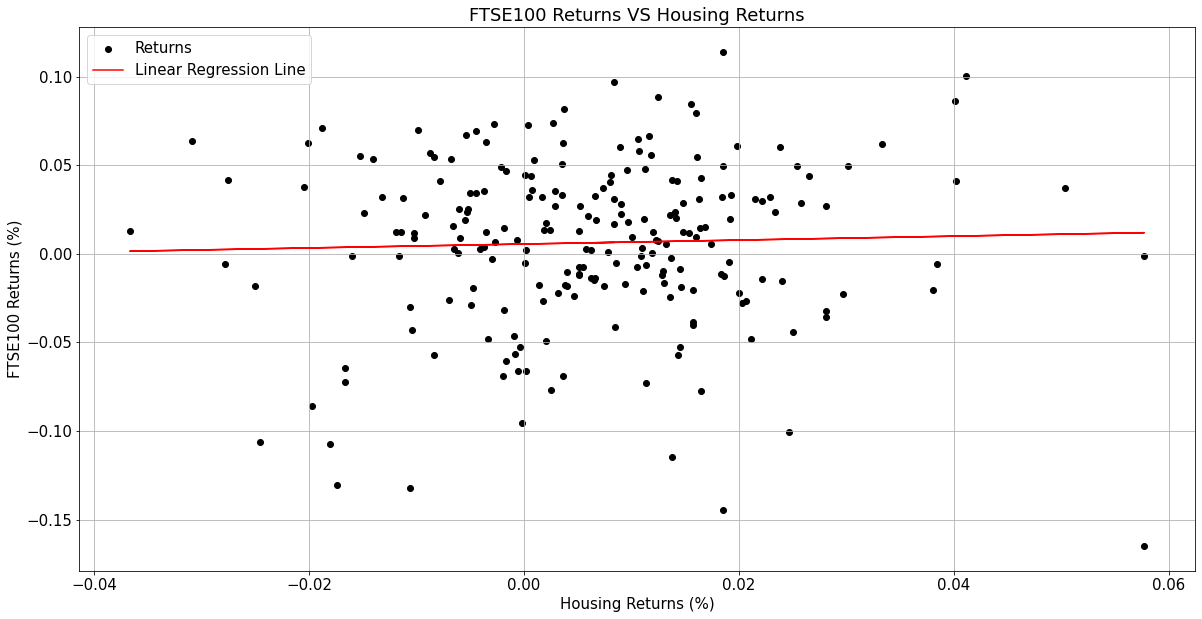

In [17]:
plt.figure(figsize=(20, 10))
plt.rcParams["font.size"] = 15

plt.scatter(housing_and_ftse100["House Returns"],
            housing_and_ftse100["FTSE Returns"],
           color = "black",
           label = "Returns")

plt.plot(housing_and_ftse100["House Returns"],
        slope * housing_and_ftse100["House Returns"] + intercept,
        color = "red",
        label = "Linear Regression Line")

plt.title("FTSE100 Returns VS Housing Returns")
plt.xlabel("Housing Returns (%)")
plt.ylabel("FTSE100 Returns (%)")
plt.legend()
plt.grid(True)

plt.show()

<h3>Question 2</h3>

In [18]:
college_df = pd.read_csv("College.csv")

In [19]:
print(college_df.head())

                     Unnamed: 0 Private  Apps  Accept  Enroll  Top10perc  \
0  Abilene Christian University     Yes  1660    1232     721         23   
1            Adelphi University     Yes  2186    1924     512         16   
2                Adrian College     Yes  1428    1097     336         22   
3           Agnes Scott College     Yes   417     349     137         60   
4     Alaska Pacific University     Yes   193     146      55         16   

   Top25perc  F.Undergrad  P.Undergrad  Outstate  Room.Board  Books  Personal  \
0         52         2885          537      7440        3300    450      2200   
1         29         2683         1227     12280        6450    750      1500   
2         50         1036           99     11250        3750    400      1165   
3         89          510           63     12960        5450    450       875   
4         44          249          869      7560        4120    800      1500   

   PhD  Terminal  S.F.Ratio  perc.alumni  Expend  Grad.R

In [20]:
college_df.rename(columns = {"Unnamed: 0": "University"}, inplace = True)

In [21]:
# (1) no. of applications received, (2) no. of enrolled students, (3) no. of out of state students,
# (4) no of admittes students top 10%, (5) no. of admitted students students top 25%

variables_of_interest = ["Apps", "Enroll", "Top10perc", "Top25perc", "Outstate", "Grad.Rate"]
independent_vars = ["Apps", "Enroll", "Top10perc", "Top25perc", "Outstate"]

In [22]:
college = college_df.loc[:, variables_of_interest]

In [23]:
print(college.head())

   Apps  Enroll  Top10perc  Top25perc  Outstate  Grad.Rate
0  1660     721         23         52      7440         60
1  2186     512         16         29     12280         56
2  1428     336         22         50     11250         54
3   417     137         60         89     12960         59
4   193      55         16         44      7560         15


In [24]:
correlation_coeffs = []
correlation_vars = []

for column in variables_of_interest:
    
    print(column)
    
    coeff = stats.pearsonr(college[column], college["Grad.Rate"])
    
    correlation_coeffs.append(coeff)
    correlation_vars.append(column)

Apps
Enroll
Top10perc
Top25perc
Outstate
Grad.Rate


In [25]:
print(correlation_coeffs)

[PearsonRResult(statistic=np.float64(0.14675459955109235), pvalue=np.float64(4.0185555608360076e-05)), PearsonRResult(statistic=np.float64(-0.022341038639948445), pvalue=np.float64(0.5340568081350209)), PearsonRResult(statistic=np.float64(0.49498923480133994), pvalue=np.float64(2.897974303520665e-49)), PearsonRResult(statistic=np.float64(0.47728116437578316), pvalue=np.float64(1.872332563758768e-45)), PearsonRResult(statistic=np.float64(0.5712899282482009), pvalue=np.float64(1.6289269593117956e-68)), PearsonRResult(statistic=1.0, pvalue=np.float64(0.0))]


In [26]:
correlation_df = pd.DataFrame(data = correlation_coeffs)

In [27]:
correlation_df["variable"] = correlation_vars

In [28]:
correlation_df

,statistic,pvalue,variable
0,0.146755,4.018556e-05,Apps
1,-0.022341,5.340568e-01,Enroll
2,0.494989,2.897974e-49,Top10perc
3,0.477281,1.872333e-45,Top25perc
4,0.571290,1.628927e-68,Outstate
5,1.000000,0.000000e+00,Grad.Rate


<h4>Part b</h4>

In [29]:
def fit_model(X, y):
    
    return sm.OLS(y, X).fit()

def stepwise_regression(full_input_df, dependent_var, alpha_enter=0.05, alpha_exit=0.15):

    # prepare independent and dependent variables
    independent_vars_df = full_input_df.drop(columns=[dependent_var])
    y = full_input_df[dependent_var]
    
    # initialize empty model and variables
    included_vars = []  # variables currently in the model
    excluded_vars = list(independent_vars_df.columns)  # variables not in the model yet
    best_model = None # initiating model
    best_included_vars = [] # best variables 
    
    # stepwise process: forward selection and backward elimination
    while excluded_vars or included_vars:
        
        # forward selection: add the best variable with lowest p_value in excluded_vars
        forward_step = False
        
        print(f"\n--- Forward Selection Step ---")
    
        for var in excluded_vars:
            
            # fit a model with the current included variables & the candidate variable
            X = sm.add_constant(independent_vars_df[included_vars + [var]])
            candidate_model = fit_model(X, y)
            p_value = candidate_model.pvalues[var] 
            
            print(f"Evaluating adding {var}: p-value = {p_value:}")
            
            # verify that pvalue is smaller than alpha_enter
            if p_value < alpha_enter:
                
                best_candidate = var
                best_candidate_model = candidate_model
                forward_step = True
                
                break 
        
        # add the best candidate if it improves the model
        
        if forward_step:
            included_vars.append(best_candidate)
            excluded_vars.remove(best_candidate)
            best_model = best_candidate_model
            best_included_vars = included_vars.copy()
            print(f"Added {best_candidate}.")
        else:
            print(f"No variables improved the model during forward selection.")
        
        # backward elimination: removes variables with high p_values 
        backward_step = False
        print(f"\n--- Backward Elimination Step ---")
        
        for var in included_vars.copy():
            X = sm.add_constant(independent_vars_df[included_vars])
            model = fit_model(X, y)
            
            # if any variable's p-value is higher than alpha_exit, remove from included_vars
            
            if model.pvalues[var] > alpha_exit:
                print(f"Evaluating removing {var}: p-value = {model.pvalues[var]:.4f}")
                included_vars.remove(var)
                backward_step = True
                
                # refit the model without the variable (using included_vars)
                best_model = fit_model(sm.add_constant(independent_vars_df[included_vars]), y)  
                best_included_vars = included_vars.copy()
                print(f"Removed {var} due to high p-value.")
        
        # re-check the p-values for all included variables after each backward step
        
        print(f"Re-checking p-values for included variables: {included_vars}")
        
        for var in included_vars.copy():
            
            X = sm.add_constant(independent_vars_df[included_vars])
            model = fit_model(X, y)
            print(f"{var}: p-value = {model.pvalues[var]:}")
        
        if not forward_step and not backward_step:
            
            # stop when neither adding nor removing variables improves the model
            
            print(f"No further improvement. Stopping the stepwise process.")
            break

    print(f"\nBest model variables: {best_included_vars}")
    return best_model, best_included_vars

In [30]:
stepwise_model, stepwise_vars = stepwise_regression(college, "Grad.Rate")


--- Forward Selection Step ---
Evaluating adding Apps: p-value = 4.0185555608360415e-05
Added Apps.

--- Backward Elimination Step ---
Re-checking p-values for included variables: ['Apps']
Apps: p-value = 4.0185555608360415e-05

--- Forward Selection Step ---
Evaluating adding Enroll: p-value = 2.622730180709507e-15
Added Enroll.

--- Backward Elimination Step ---
Re-checking p-values for included variables: ['Apps', 'Enroll']
Apps: p-value = 6.255524003894826e-19
Enroll: p-value = 2.622730180709507e-15

--- Forward Selection Step ---
Evaluating adding Top10perc: p-value = 2.4608476690566094e-39
Added Top10perc.

--- Backward Elimination Step ---
Re-checking p-values for included variables: ['Apps', 'Enroll', 'Top10perc']
Apps: p-value = 4.753579720972243e-06
Enroll: p-value = 6.009455992737383e-09
Top10perc: p-value = 2.4608476690566094e-39

--- Forward Selection Step ---
Evaluating adding Top25perc: p-value = 0.0011699066041019658
Added Top25perc.

--- Backward Elimination Step ---


In [31]:
stepwise_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Grad.Rate   R-squared:                       0.386
Model:                            OLS   Adj. R-squared:                  0.383
Method:                 Least Squares   F-statistic:                     121.2
Date:                Sat, 18 Jan 2025   Prob (F-statistic):           3.10e-80
Time:                        14:33:18   Log-Likelihood:                -3122.2
No. Observations:                 777   AIC:                             6254.
Df Residuals:                     772   BIC:                             6278.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.9300      1.719     20.317      0.000      31.555      38.305
Apps           0.0008      0.000      3.122      0.002       0.000       0.001
Enroll        -0.0031      0.001     -2.892      0.004      -0.005      -0.001
Top25perc      0.2160      0.030      7.125      0.000       0.157       0.276
Outstate       0.0018      0.000     11.866      0.000       0.001       0.002
==============================================================================
Omnibus:                       23.227   Durbin-Watson:                   1.950
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               41.276
Skew:                           0.202   Prob(JB):                     1.09e-09
Kurtosis:                       4.055   Cond. No.                     4.13e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.13e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [32]:
def stepwise_regression_with_bic(full_input_df, dependent_var):
    
    # prepare independent and dependent variables
    
    independent_vars_df = full_input_df.drop(columns=[dependent_var])
    y = full_input_df[dependent_var]
    n = len(y)  # number of observations to include in BIC equation later
    
    # initialize empty model and variables
    
    included_vars = []
    excluded_vars = list(independent_vars_df.columns)
    best_bic = float('inf') 
    best_model = None
    best_included_vars = []
    
    # stepwise process: Forward selection and backward elimination
    
    while excluded_vars or included_vars:
        
        # forward selection: Add the best variable that lowers BIC
        
        forward_step = False
        best_new_bic = best_bic
        
        print(f"\n--- Forward Selection Step ---")
        
        for var in excluded_vars:
            
            # fit a model with the current included variables + the candidate variable
            
            X = sm.add_constant(independent_vars_df[included_vars + [var]])
            candidate_model = fit_model(X, y)
            bic = candidate_model.bic  # Use BIC to evaluate model
            
            print(f"Evaluating adding {var}: BIC = {bic:.4f}")
            
            if bic < best_new_bic:
                best_new_bic = bic
                best_candidate = var
                best_candidate_model = candidate_model
                forward_step = True
        
        # add the best candidate if it improves the BIC
        
        if forward_step:
            included_vars.append(best_candidate)
            excluded_vars.remove(best_candidate)
            best_bic = best_new_bic
            best_model = best_candidate_model
            best_included_vars = included_vars.copy()
            print(f"Added {best_candidate}. New model BIC: {best_bic:.4f}")
        else:
            print(f"No variables improved BIC during forward selection.")
        
        # backward elimination: remove the variable that increases BIC the least
        
        backward_step = False
        print(f"\n--- Backward Elimination Step ---")
        
        for var in included_vars.copy():
        
            # fit model without the current variable
            
            X = sm.add_constant(independent_vars_df[[v for v in included_vars if v != var]])
            candidate_model = fit_model(X, y)
            bic = candidate_model.bic
            
            print(f"Evaluating removing {var}: BIC = {bic:.4f}")
            
            # if removing the variable improves BIC, remove it (checking with current best_bic)
            
            if bic < best_bic:  
                
                included_vars.remove(var)
                backward_step = True
                best_model = candidate_model
                best_bic = bic
                best_included_vars = included_vars.copy()
                print(f"Removed {var}. New model BIC: {best_bic:.4f}")
        
        if not forward_step and not backward_step:
            
            # stop when neither adding nor removing variables improves the model
            
            print(f"No further improvement. Stopping the stepwise process.")
            break

    print(f"\nBest model variables: {best_included_vars}, Final model BIC: {best_bic:.4f}")
    return best_model, best_included_vars

In [33]:
bic_model, bic_vars = stepwise_regression_with_bic(college, "Grad.Rate")


--- Forward Selection Step ---
Evaluating adding Apps: BIC = 6619.3977
Evaluating adding Enroll: BIC = 6635.9268
Evaluating adding Top10perc: BIC = 6417.9338
Evaluating adding Top25perc: BIC = 6435.4538
Evaluating adding Outstate: BIC = 6329.3395
Added Outstate. New model BIC: 6329.3395

--- Backward Elimination Step ---
Evaluating removing Outstate: BIC = 6629.6593

--- Forward Selection Step ---
Evaluating adding Apps: BIC = 6319.6968
Evaluating adding Enroll: BIC = 6330.7529
Evaluating adding Top10perc: BIC = 6283.3335
Evaluating adding Top25perc: BIC = 6274.3330
Added Top25perc. New model BIC: 6274.3330

--- Backward Elimination Step ---
Evaluating removing Outstate: BIC = 6435.4538
Evaluating removing Top25perc: BIC = 6329.3395

--- Forward Selection Step ---
Evaluating adding Apps: BIC = 6279.3930
Evaluating adding Enroll: BIC = 6280.7696
Evaluating adding Top10perc: BIC = 6279.7666
No variables improved BIC during forward selection.

--- Backward Elimination Step ---
Evaluating

In [34]:
bic_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Grad.Rate   R-squared:                       0.378
Model:                            OLS   Adj. R-squared:                  0.376
Method:                 Least Squares   F-statistic:                     235.0
Date:                Sat, 18 Jan 2025   Prob (F-statistic):           1.82e-80
Time:                        14:33:28   Log-Likelihood:                -3127.2
No. Observations:                 777   AIC:                             6260.
Df Residuals:                     774   BIC:                             6274.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         33.0860      1.607     20.593      0.000      29.932      36.240
Outstate       0.0019      0.000     13.658      0.000       0.002       0.002
Top25perc      0.2255      0.028      7.995      0.000       0.170       0.281
==============================================================================
Omnibus:                       25.071   Durbin-Watson:                   1.945
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               48.404
Skew:                           0.189   Prob(JB):                     3.08e-11
Kurtosis:                       4.163   Cond. No.                     3.69e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.69e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [35]:
full_model = fit_model(college[independent_vars], college["Grad.Rate"])

In [36]:
full_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              Grad.Rate   R-squared (uncentered):                   0.946
Model:                            OLS   Adj. R-squared (uncentered):              0.946
Method:                 Least Squares   F-statistic:                              2707.
Date:                Sun, 27 Oct 2024   Prob (F-statistic):                        0.00
Time:                        12:46:43   Log-Likelihood:                         -3243.1
No. Observations:                 777   AIC:                                      6496.
Df Residuals:                     772   BIC:                                      6519.
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Apps       -5.856e-07      0.000     -0.002      0.998      -0.001       0.001
Enroll         0.0015      0.001      1.251      0.211      -0.001       0.004
Top10perc     -0.5961      0.061     -9.795      0.000      -0.716      -0.477
Top25perc      0.8178      0.046     17.721      0.000       0.727       0.908
Outstate       0.0032      0.000     20.955      0.000       0.003       0.003
==============================================================================
Omnibus:                       26.233   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               55.792
Skew:                           0.157   Prob(JB):                     7.67e-13
Kurtosis:                       4.275   Cond. No.                     1.47e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.47e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [37]:
def compare_models(models, model_names, X, y):

    model_stats = []

    # loop through each model and extract statistics
    
    for i, model in enumerate(models):
        
        model_name = model_names[i]
        
        # add the constant term for prediction
        
        X_with_const = sm.add_constant(X[model.model.exog_names[1:]])
        
        # predict the values: using it to extract the statistical numbers later
        
        y_pred = model.predict(X_with_const)
        
        # calculate statistics
        
        r_squared = model.rsquared
        bic = model.bic
        rmse = np.sqrt(mean_squared_error(y, y_pred))
        
        # store data in a dictionary to create a dataframe with it later
        
        stats_dict = {
            'Model': model_name,
            'R_squared': r_squared,
            'BIC': bic,
            'RMSE': rmse
        }
        
        model_stats.append(stats_dict)
    
    stats_df = pd.DataFrame(model_stats)
    
    return stats_df

In [38]:
models = [stepwise_model, bic_model, full_model]
model_names = ['Stepwise', 'BIC', "Full Variables"]

In [39]:
stats_df = compare_models(models, model_names, college, college["Grad.Rate"])

print(stats_df)

            Model  R_squared          BIC       RMSE
0        Stepwise   0.385696  6277.675824  13.454801
1             BIC   0.377764  6274.332982  13.541383
2  Full Variables   0.946047  6519.454820  15.719798


In [40]:
def predict_graduation_rate(model, predictor_df):
    
    # add a constant term (intercept) to the predictors
    predictors_with_const = sm.add_constant(predictor_df, has_constant='add')

    # validate that predictors I input match with the model
    predictors_with_const = predictors_with_const[model.model.exog_names]
    
    predicted_grad_rate = model.predict(predictors_with_const)
    
    return predicted_grad_rate

In [41]:
cmu = college_df[college_df["University"] == "Carnegie Mellon University"]
print(cmu)

                    University Private  Apps  Accept  Enroll  Top10perc  \
87  Carnegie Mellon University     Yes  8728    5201    1191         60   

    Top25perc  F.Undergrad  P.Undergrad  Outstate  Room.Board  Books  \
87         89         4265          291     17900        5690    450   

    Personal  PhD  Terminal  S.F.Ratio  perc.alumni  Expend  Grad.Rate  
87      1250   86        93        9.2           31   24386         74  


In [42]:
cmu_stepwise_vars = cmu[stepwise_vars]
cmu_bic_vars = cmu[bic_vars]
cmu_full_vars = cmu[independent_vars]

In [43]:
grad_rate_stepwise = predict_graduation_rate(stepwise_model, cmu_stepwise_vars)
print(grad_rate_stepwise)

87    89.125103
dtype: float64


In [44]:
grad_rate_bic = predict_graduation_rate(bic_model, cmu_bic_vars)
print(grad_rate_bic)

87    87.093524
dtype: float64


In [45]:
grad_rate_full = predict_graduation_rate(full_model, cmu_full_vars)
print(grad_rate_full)

87    95.801258
dtype: float64


<h3>Question 3</h3>

In [46]:
auto_parts = pd.read_csv("auto_parts.csv")
vehicle_miles_driven = pd.read_csv("vehicle_miles_driven.csv")

In [47]:
print(auto_parts.head())
print(vehicle_miles_driven.head())

         DATE  MRTSSM441USN
0  1992-01-01       29811.0
1  1992-02-01       31217.0
2  1992-03-01       35136.0
3  1992-04-01       36082.0
4  1992-05-01       36460.0
         DATE  TRFVOLUSM227NFWA
0  1970-01-01           80173.0
1  1970-02-01           77442.0
2  1970-03-01           90223.0
3  1970-04-01           89956.0
4  1970-05-01           97972.0


In [48]:
auto_parts.columns = ["Date", "Auto Parts Sales"]
vehicle_miles_driven.columns = ["Date", "Millions of Miles Driven"]

In [49]:
print(auto_parts.head())
print(vehicle_miles_driven.head())

         Date  Auto Parts Sales
0  1992-01-01           29811.0
1  1992-02-01           31217.0
2  1992-03-01           35136.0
3  1992-04-01           36082.0
4  1992-05-01           36460.0
         Date  Millions of Miles Driven
0  1970-01-01                   80173.0
1  1970-02-01                   77442.0
2  1970-03-01                   90223.0
3  1970-04-01                   89956.0
4  1970-05-01                   97972.0


In [50]:
parts_and_miles = auto_parts.merge(vehicle_miles_driven, how = "inner")

In [51]:
parts_and_miles["Auto Parts Sales"] = pd.to_numeric(parts_and_miles["Auto Parts Sales"], errors = "coerce")

In [52]:
# normalizing values for graphing (kind of a rule of thumb for better visualization)
parts_and_miles["Auto Parts Sales (Norm.)"] = (parts_and_miles["Auto Parts Sales"] / parts_and_miles["Auto Parts Sales"].iloc[0]) * 100
parts_and_miles["Millions of Miles Driven (Norm.)"] = (parts_and_miles["Millions of Miles Driven"] / parts_and_miles["Millions of Miles Driven"].iloc[0]) * 100

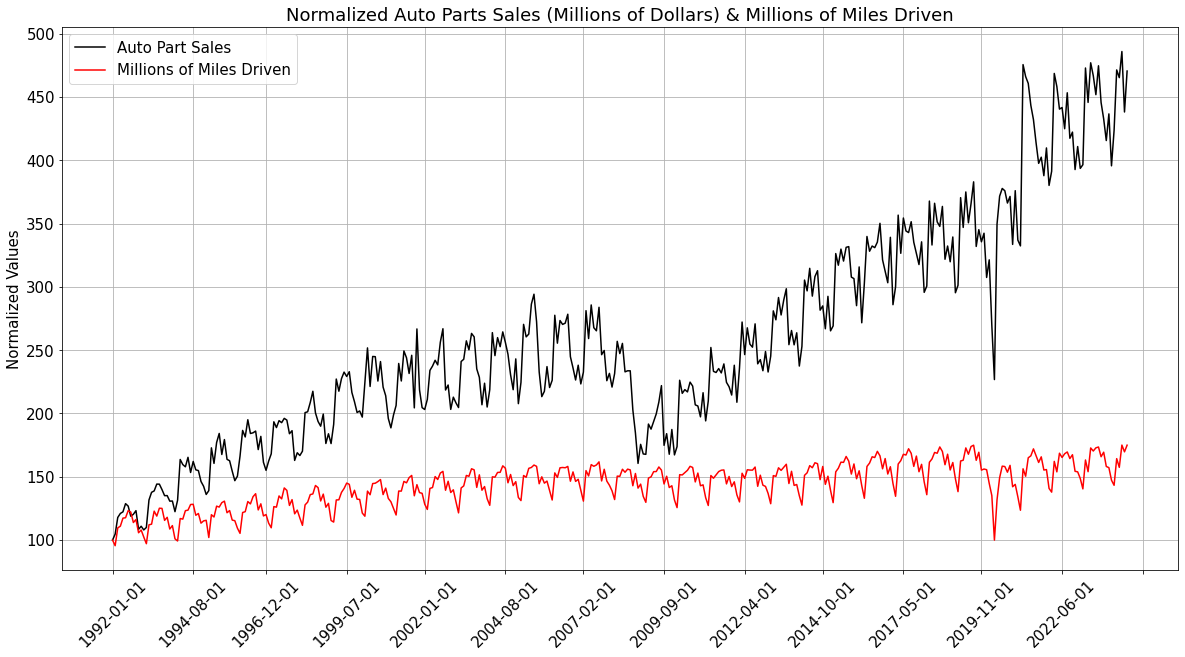

In [53]:
plt.figure(figsize=(20, 10))
plt.rcParams["font.size"] = 15

plt.plot(parts_and_miles["Date"], 
         parts_and_miles["Auto Parts Sales (Norm.)"],
        color = "black",
        label = "Auto Part Sales")

plt.plot(parts_and_miles["Date"],
         parts_and_miles["Millions of Miles Driven (Norm.)"],
        color = "red",
        label = "Millions of Miles Driven")

plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.xticks(rotation=45)
plt.title("Normalized Auto Parts Sales (Millions of Dollars) & Millions of Miles Driven")
plt.ylabel("Normalized Values")
plt.grid(True)
plt.legend()
plt.show()

In [54]:
# calculating returns for each (or % change)
parts_and_miles["Auto Parts Sales Returns"] = parts_and_miles["Auto Parts Sales"].pct_change()
parts_and_miles["Millions of Miles Driven Returns"] = parts_and_miles["Millions of Miles Driven"].pct_change()

In [55]:
parts_and_miles.dropna(inplace = True)

In [56]:
# correlation and pvalues for returns
corr_parts_and_miles_r, pvalue_parts_and_miles_r = stats.pearsonr(parts_and_miles["Millions of Miles Driven Returns"],
                                                         parts_and_miles["Auto Parts Sales Returns"])

In [57]:
print(corr_parts_and_miles_r)

0.7610307841525545


In [58]:
print(pvalue_parts_and_miles_r)

6.341099120278205e-75


In [59]:
# correlation and pvalues for actual values
corr_parts_and_miles, pvalue_parts_and_miles = stats.pearsonr(parts_and_miles["Millions of Miles Driven"],
                                                         parts_and_miles["Auto Parts Sales"])

In [60]:
print(corr_parts_and_miles)

0.7852913562743801


In [61]:
print(pvalue_parts_and_miles)

8.354077260366628e-83


In [62]:
# regressing values of auto parts and millions of miles driven
slope, intercept, r_value, p_value, std_err = stats.linregress(parts_and_miles["Millions of Miles Driven"].dropna(),
                              parts_and_miles["Auto Parts Sales"].dropna())

In [63]:
print(slope, intercept, r_value, p_value, std_err)

0.7105745052873427 -94215.24159053173 0.7852913562743805 8.354077260364531e-83 0.02844082937141188


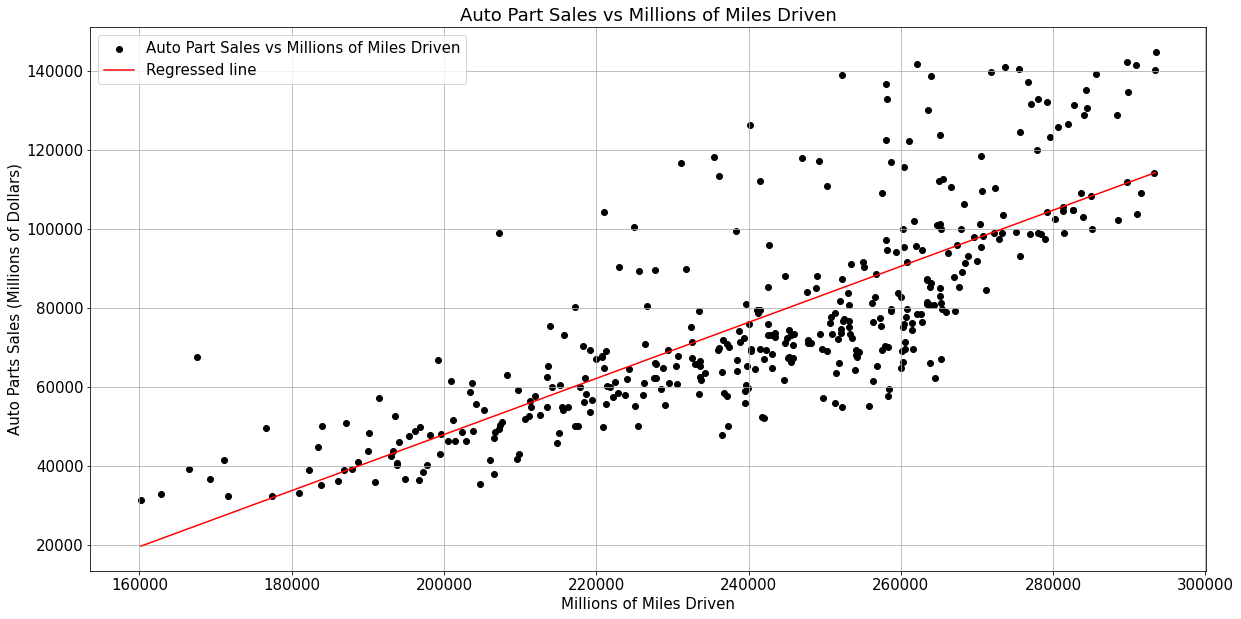

In [64]:
plt.figure(figsize=(20, 10))
plt.rcParams["font.size"] = 15

plt.scatter(parts_and_miles["Millions of Miles Driven"],
            parts_and_miles["Auto Parts Sales"],
           color = "black",
           label = "Auto Part Sales vs Millions of Miles Driven")

plt.plot(parts_and_miles["Millions of Miles Driven"],
        slope * parts_and_miles["Millions of Miles Driven"] + intercept,
        color = "red",
        label = "Regressed line")

plt.title("Auto Part Sales vs Millions of Miles Driven")
plt.xlabel("Millions of Miles Driven")
plt.ylabel("Auto Parts Sales (Millions of Dollars)")
plt.grid(True)
plt.legend()
plt.show()

In [65]:
print(parts_and_miles.head())

         Date  Auto Parts Sales  Millions of Miles Driven  \
1  1992-02-01           31217.0                  160204.0   
2  1992-03-01           35136.0                  183778.0   
3  1992-04-01           36082.0                  186069.0   
4  1992-05-01           36460.0                  196725.0   
5  1992-06-01           38389.0                  197232.0   

   Auto Parts Sales (Norm.)  Millions of Miles Driven (Norm.)  \
1                104.716380                         95.557464   
2                117.862534                        109.618734   
3                121.035859                        110.985255   
4                122.303848                        117.341278   
5                128.774613                        117.643691   

   Auto Parts Sales Returns  Millions of Miles Driven Returns  
1                  0.047164                         -0.044425  
2                  0.125541                          0.147150  
3                  0.026924                       

In [66]:
# regressing returns of millions of miles driven and auto parts sales
slope_r, intercept_r, r_value_r, p_value_r, std_err_r = stats.linregress(parts_and_miles["Millions of Miles Driven Returns"].dropna(),
                              parts_and_miles["Auto Parts Sales Returns"].dropna())

In [67]:
print(slope_r, intercept_r, r_value_r, p_value_r, std_err_r)

0.9655931259048601 0.004079440395207927 0.7610307841525548 6.341099120277001e-75 0.04178597413470558


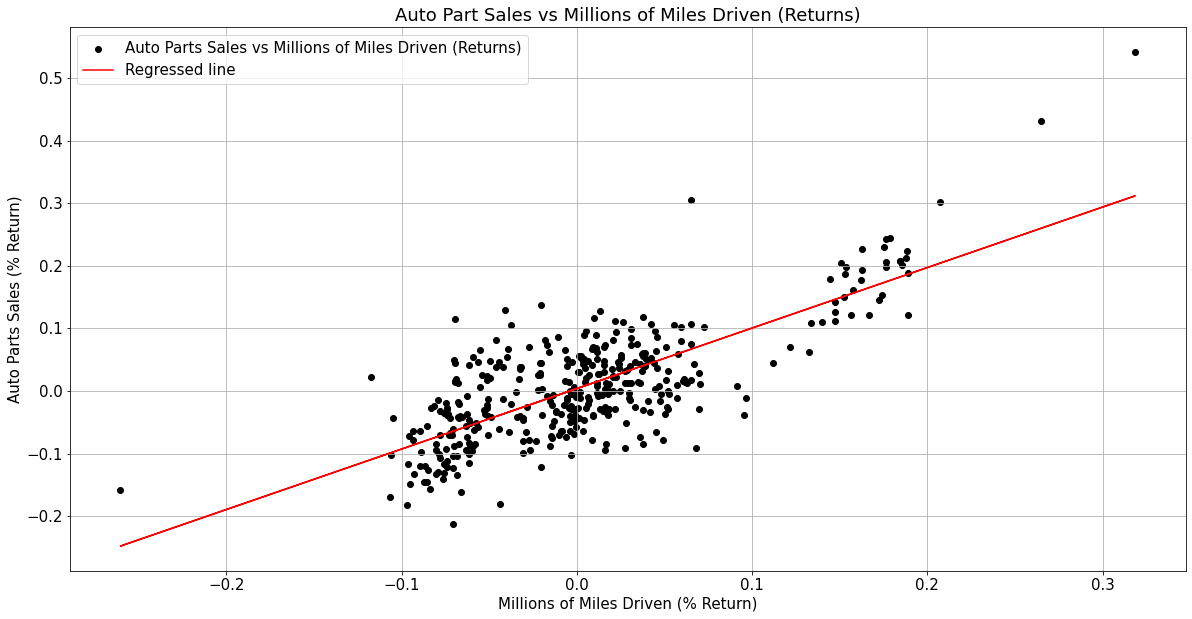

In [68]:
plt.figure(figsize=(20, 10))
plt.rcParams["font.size"] = 15

plt.scatter(parts_and_miles["Millions of Miles Driven Returns"],
            parts_and_miles["Auto Parts Sales Returns"],
           color = "black",
           label = "Auto Parts Sales vs Millions of Miles Driven (Returns)")

plt.plot(parts_and_miles["Millions of Miles Driven Returns"],
        slope_r * parts_and_miles["Millions of Miles Driven Returns"] + intercept_r,
        color = "red",
        label = "Regressed line")

plt.title("Auto Part Sales vs Millions of Miles Driven (Returns)")
plt.xlabel("Millions of Miles Driven (% Return)")
plt.ylabel("Auto Parts Sales (% Return)")
plt.grid(True)
plt.legend()
plt.show()

In [69]:
# splitting the data between training and testing
train_data = parts_and_miles[(parts_and_miles['Date'] >= '2014-01-01') & (parts_and_miles['Date'] <= '2019-12-31')]
test_data = parts_and_miles[parts_and_miles['Date'] >= '2020-01-01']

In [70]:
# training data for independent variable and dependent variable
X_train = train_data["Millions of Miles Driven"]
y_train = train_data["Auto Parts Sales"]

In [71]:
# using the training data to train the model
slope, intercept, r_value, p_value, std_err = stats.linregress(X_train, y_train)

In [72]:
# preparing the train data to plot it later
# test data uses intercept and slope from the training data to predict the test data
train_data['Predicted Auto Parts Sales'] = intercept + slope * X_train
test_data['Predicted Auto Parts Sales'] = intercept + slope * test_data["Millions of Miles Driven"]

/var/folders/mv/w58n0t094j1_0td5w0b14jy00000gn/T/ipykernel_50007/746080944.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['Predicted Auto Parts Sales'] = intercept + slope * X_train
/var/folders/mv/w58n0t094j1_0td5w0b14jy00000gn/T/ipykernel_50007/746080944.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted Auto Parts Sales'] = intercept + slope * test_data["Millions of Miles Driven"]


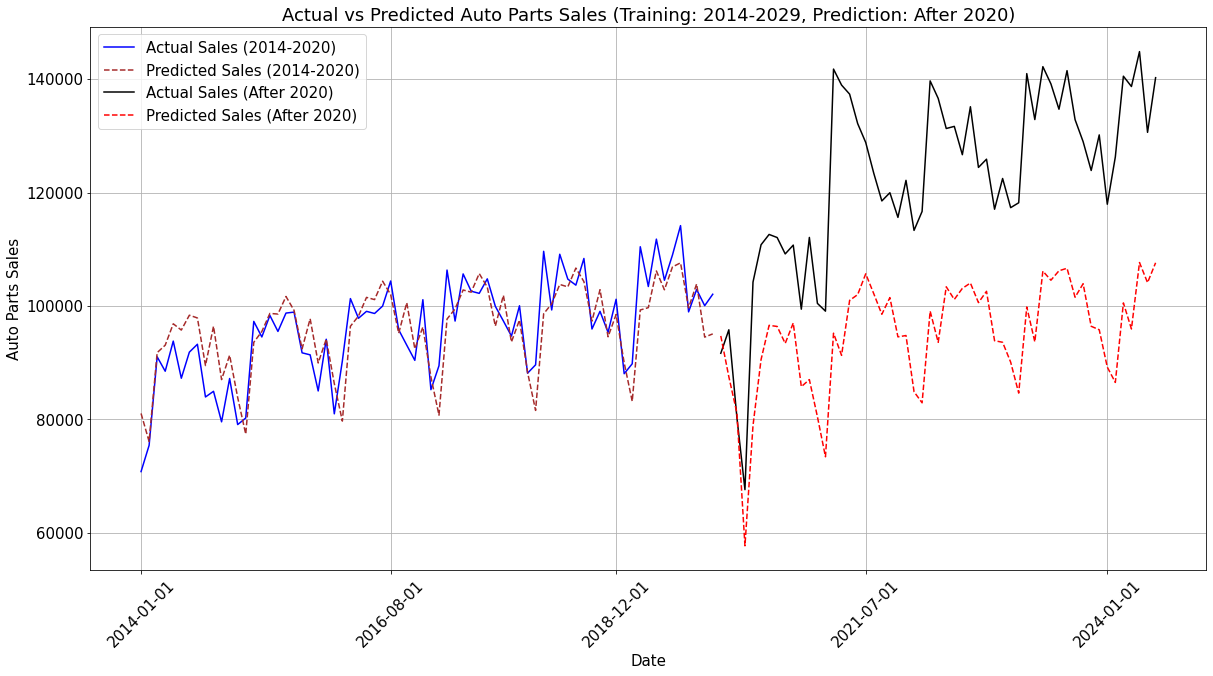

In [73]:
plt.figure(figsize=(20,10))

plt.plot(train_data['Date'],
         train_data['Auto Parts Sales'],
         label='Actual Sales (2014-2020)',
         color='blue')

plt.plot(train_data['Date'],
         train_data['Predicted Auto Parts Sales'],
         label='Predicted Sales (2014-2020)',
         linestyle='--',
         color='brown')

plt.plot(test_data['Date'],
         test_data['Auto Parts Sales'],
         label='Actual Sales (After 2020)',
         color='black')

plt.plot(test_data['Date'],
         test_data['Predicted Auto Parts Sales'],
         label='Predicted Sales (After 2020)',
         linestyle='--',
         color='red')

plt.xlabel('Date')
plt.ylabel('Auto Parts Sales')
plt.title('Actual vs Predicted Auto Parts Sales (Training: 2014-2029, Prediction: After 2020)')
plt.legend()

plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [74]:
# filtering data in 2021
test_data_2021 = test_data[(test_data['Date'] >= '2021-01-01') & (test_data['Date'] <= '2021-12-31')]

print(test_data_2021.loc[:, ["Date", "Auto Parts Sales", "Predicted Auto Parts Sales"]])

           Date  Auto Parts Sales  Predicted Auto Parts Sales
348  2021-01-01          100460.0                80472.744301
349  2021-02-01           99091.0                73406.912759
350  2021-03-01          141782.0                95203.051913
351  2021-04-01          138960.0                91293.998416
352  2021-05-01          137361.0               100988.625759
353  2021-06-01          132167.0               102008.862124
354  2021-07-01          128836.0               105674.567414
355  2021-08-01          123405.0               102162.493048
356  2021-09-01          118527.0                98536.088692
357  2021-10-01          119978.0               101480.085923
358  2021-11-01          115627.0                94555.181972
359  2021-12-01          122160.0                94791.384555


In [75]:
test_data_2021["error"] = (test_data["Predicted Auto Parts Sales"] - test_data["Auto Parts Sales"])/test_data["Auto Parts Sales"] * 100

/var/folders/mv/w58n0t094j1_0td5w0b14jy00000gn/T/ipykernel_50007/1157146955.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data_2021["error"] = (test_data["Predicted Auto Parts Sales"] - test_data["Auto Parts Sales"])/test_data["Auto Parts Sales"] * 100


In [76]:
test_data_2021.loc[:, ["Date", "Auto Parts Sales", "Predicted Auto Parts Sales", "error"]]

,Date,Auto Parts Sales,Predicted Auto Parts Sales,error
348,2021-01-01,100460.0,80472.744301,-19.895735
349,2021-02-01,99091.0,73406.912759,-25.919697
350,2021-03-01,141782.0,95203.051913,-32.852512
351,2021-04-01,138960.0,91293.998416,-34.301959
352,2021-05-01,137361.0,100988.625759,-26.479404
353,2021-06-01,132167.0,102008.862124,-22.818206
354,2021-07-01,128836.0,105674.567414,-17.977454
355,2021-08-01,123405.0,102162.493048,-17.213652
356,2021-09-01,118527.0,98536.088692,-16.866124
357,2021-10-01,119978.0,101480.085923,-15.417755


In [78]:
test_data_2021.loc[:, ["error"]].mean()

error   -22.530864
dtype: float64

<h3>Question 4</h3>

In [78]:
unemployment_data = pd.read_csv("Israeli_Unemployment_Rate.csv")

In [79]:
print(unemployment_data)

          Date   Value
0   1980-12-31   4.780
1   1981-12-31   5.115
2   1982-12-31   5.048
3   1983-12-31   4.562
4   1984-12-31   5.893
5   1985-12-31   6.693
6   1986-12-31   7.078
7   1987-12-31   6.057
8   1988-12-31   6.428
9   1989-12-31   8.881
10  1990-12-31   9.567
11  1991-12-31  10.585
12  1992-12-31  11.155
13  1993-12-31  10.015
14  1994-12-31   7.828
15  1995-12-31   6.863
16  1996-12-31   8.325
17  1997-12-31   9.525
18  1998-12-31  10.675
19  1999-12-31  11.075
20  2000-12-31  10.900
21  2001-12-31  11.625
22  2002-12-31  12.875
23  2003-12-31  13.400
24  2004-12-31  12.900
25  2005-12-31  11.200
26  2006-12-31  10.450
27  2007-12-31   9.150
28  2008-12-31   7.650
29  2009-12-31   9.425
30  2010-12-31   8.250
31  2011-12-31   7.050
32  2012-12-31   6.900
33  2013-12-31   6.250
34  2014-12-31   5.900
35  2015-12-31   5.325
36  2016-12-31   4.800
37  2017-12-31   4.275
38  2018-12-31   4.000
39  2019-12-31   3.800
40  2020-12-31  12.000
41  2021-12-31   7.600
42  2022-12

In [80]:
unemployment_data["Date"] = pd.to_datetime(unemployment_data["Date"])

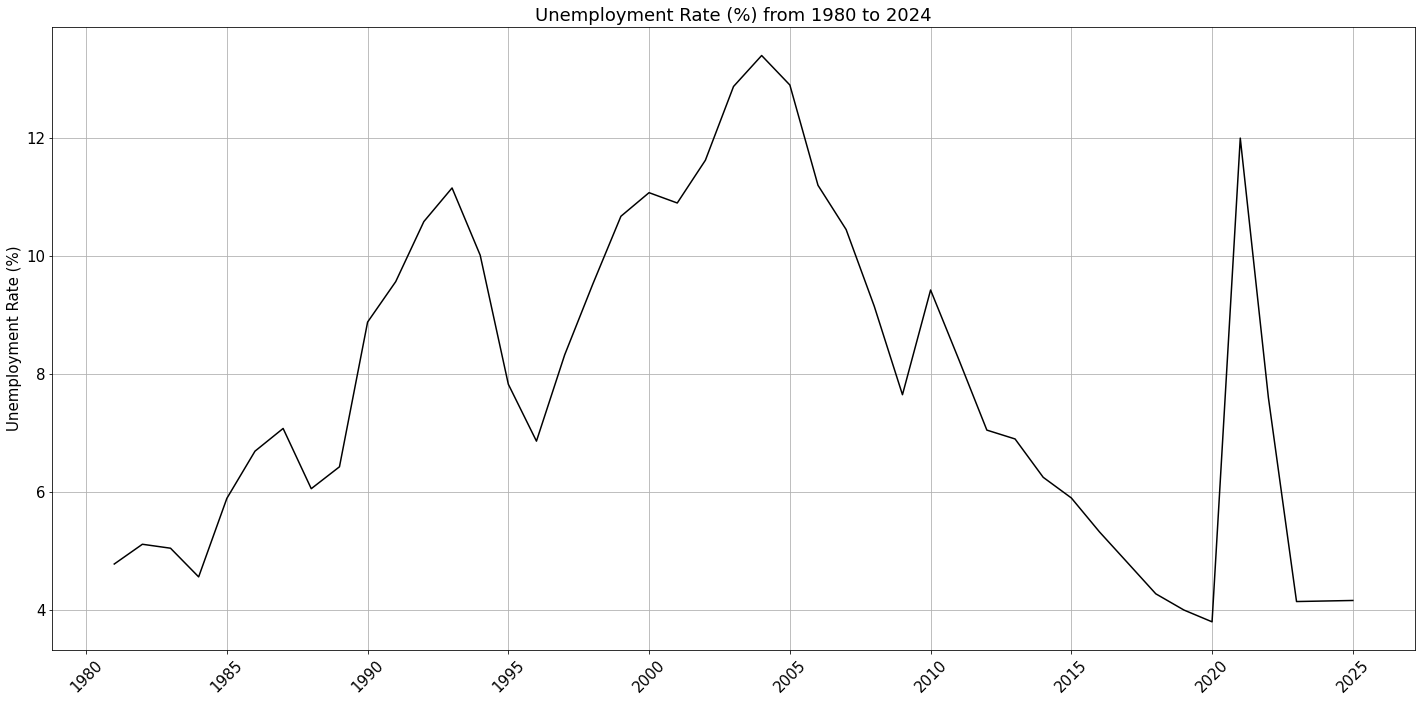

In [81]:
plt.figure(figsize=(20, 10))
plt.rcParams["font.size"] = 15

plt.plot(unemployment_data["Date"], unemployment_data["Value"], color = "black")

plt.title("Unemployment Rate (%) from 1980 to 2024")
plt.xticks(rotation=45)
plt.ylabel("Unemployment Rate (%)")
plt.tight_layout()
plt.grid(True)
plt.show()

In [82]:
# going to ordinal format of datetime to use it in linear regression
unemployment_data['Date_Ordinal'] = unemployment_data['Date'].apply(lambda x: x.toordinal())

unemployment_data.dropna(inplace=True)

In [83]:
# setting the independent and depedent variables
X = unemployment_data['Date_Ordinal']
y = unemployment_data['Value']

In [84]:
# linearly regressing actual value and time
slope_u, intercept_u, r_value_u, p_value_u, std_err_u = stats.linregress(X, y)

In [85]:
print(slope_u, intercept_u, r_value_u, p_value_u, std_err_u)

-7.888583863245663e-05 65.55656345818804 -0.13429694800639072 0.3791118657294632 8.876597588306649e-05


In [86]:
# y = a + bx
unemployment_data['Predicted'] = intercept_u + slope_u * X

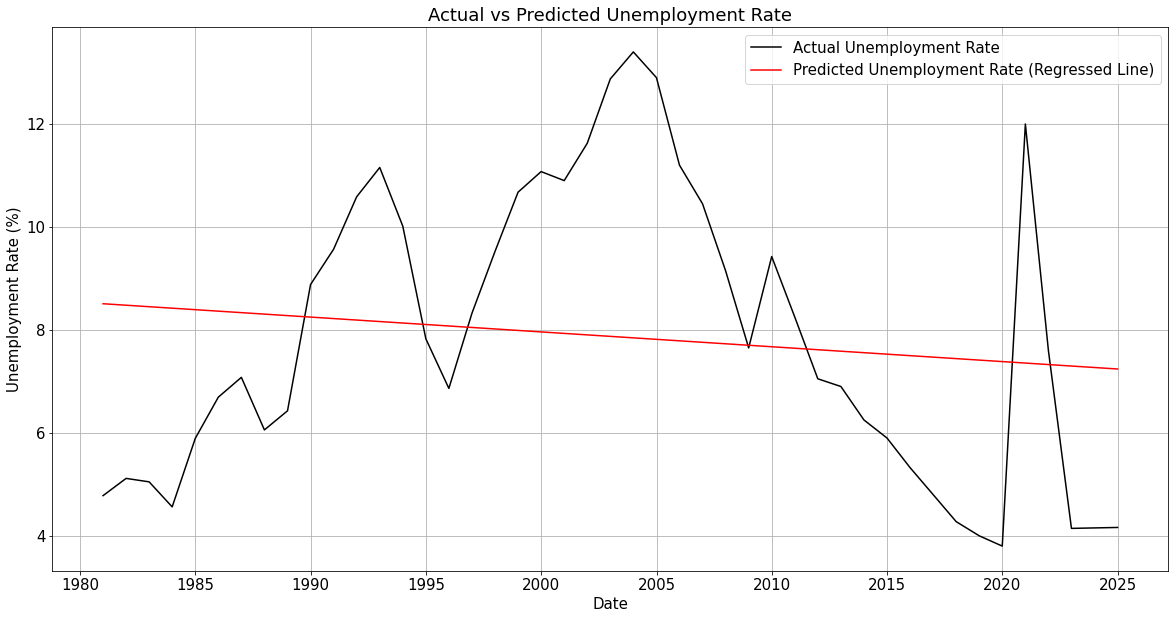

In [87]:
plt.figure(figsize=(20, 10))

plt.plot(unemployment_data['Date'],
         unemployment_data['Value'],
         label='Actual Unemployment Rate',
         color='black')

plt.plot(unemployment_data['Date'],
         unemployment_data['Predicted'],
         label='Predicted Unemployment Rate (Regressed Line)',
         color='red')


plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.title('Actual vs Predicted Unemployment Rate')
plt.legend()
plt.grid(True)
plt.show()

In [88]:
print(unemployment_data)

         Date   Value  Date_Ordinal  Predicted
0  1980-12-31   4.780        723180   8.507903
1  1981-12-31   5.115        723545   8.479109
2  1982-12-31   5.048        723910   8.450316
3  1983-12-31   4.562        724275   8.421523
4  1984-12-31   5.893        724641   8.392650
5  1985-12-31   6.693        725006   8.363857
6  1986-12-31   7.078        725371   8.335064
7  1987-12-31   6.057        725736   8.306270
8  1988-12-31   6.428        726102   8.277398
9  1989-12-31   8.881        726467   8.248605
10 1990-12-31   9.567        726832   8.219812
11 1991-12-31  10.585        727197   8.191018
12 1992-12-31  11.155        727563   8.162146
13 1993-12-31  10.015        727928   8.133353
14 1994-12-31   7.828        728293   8.104559
15 1995-12-31   6.863        728658   8.075766
16 1996-12-31   8.325        729024   8.046894
17 1997-12-31   9.525        729389   8.018101
18 1998-12-31  10.675        729754   7.989307
19 1999-12-31  11.075        730119   7.960514
20 2000-12-31

In [89]:
# calculate MAPE for each row
data_1980_2013 = unemployment_data[(unemployment_data['Date'] >= '1998-01-01') & (unemployment_data['Date'] <= '2013-12-31')]

data_1980_2013['MAPE'] = (abs(data_1980_2013['Value'] - data_1980_2013['Predicted']) / data_1980_2013['Value']) * 100

print(data_1980_2013['MAPE'].mean())

23.090924358447033


/var/folders/mv/w58n0t094j1_0td5w0b14jy00000gn/T/ipykernel_20179/1866632476.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_1980_2013['MAPE'] = (abs(data_1980_2013['Value'] - data_1980_2013['Predicted']) / data_1980_2013['Value']) * 100


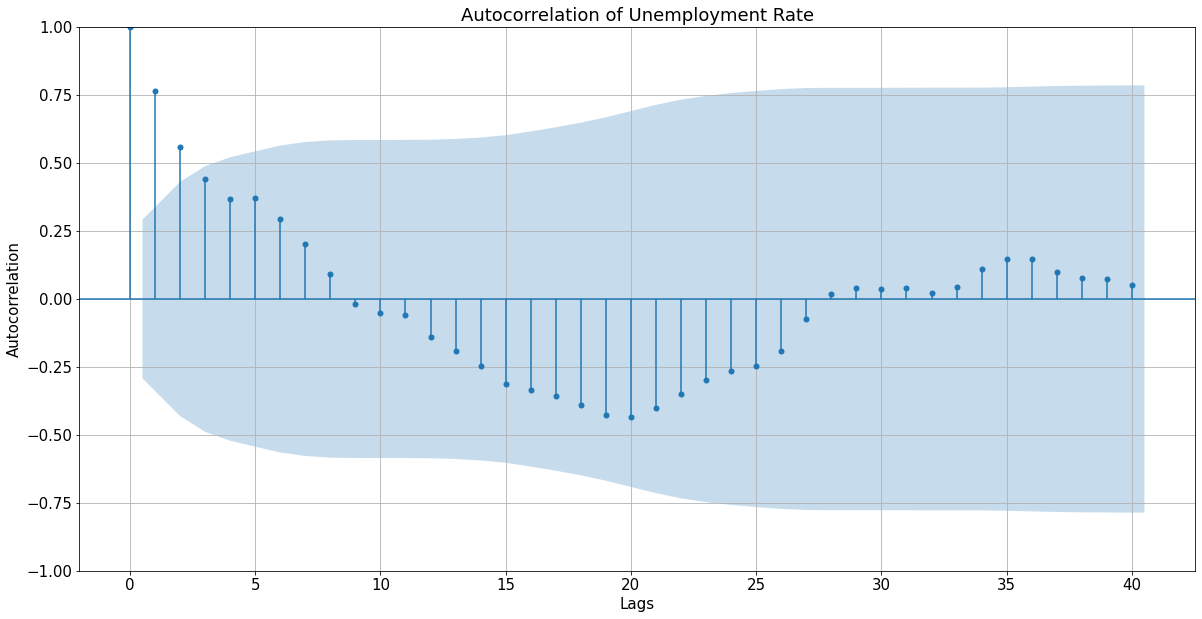

In [90]:
fig, ax = plt.subplots(figsize=(20, 10))

# autocorrelation graph for unemployment rate
plot_acf(unemployment_data['Value'], lags = 40, alpha = 0.05, ax=ax)

ax.set_title('Autocorrelation of Unemployment Rate')
ax.set_xlabel('Lags')
ax.set_ylabel('Autocorrelation')

plt.grid(True)
plt.show()